In [1]:
import numpy as np
import random
import time
from IPython.display import clear_output
from matplotlib import pyplot as plot
import numpy as np

C:\Users\diego\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\diego\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\diego\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


Get actions and states for the board

In [2]:
actions = [0,1,2,3] #0 = up, 1 = right, 2 = left and 3 = down
action_space_size = 4 #Because it has 4 actions (up, down, left, right)
state_space_size = 62 #Because the configuration varies when Harry moves on the 9*7 board and Sirius occupies one space 

print(action_space_size,state_space_size)

4 62


In [3]:
#Enviroment
enviroment = np.zeros((7, 9))
enviroment[1][1] = 1 #Harry 
enviroment[6][4] = 2 #Sirius
enviroment

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0.]])

In [4]:
initialEnviroment = np.zeros((7,9)) #this will be our way to reset the enviroment.
np.copyto(initialEnviroment, enviroment)
initialEnviroment

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0.]])

Initialize parameters

In [5]:
num_episodes = 5000
max_steps_per_episode = 100

learning_rate = 0.2
discount_rate = 0.95

rewards_avg = []

q_table = np.zeros((state_space_size, action_space_size))
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


Run Q-Learning algorithm:

In [15]:
def myStep(action, x, y):
    #new_state, reward, done, info = env.step(action)
    if action == 0:
        y+=1
        if y >= 6:
            y-=1
    if action == 1:
        x+=1
        if x >= 8:
            x-=1
    if action == 2:
        x+=1
        if x <= 0:
            x+=1
    if action == 3:
        y-=1
        if y <= 0:
            y+=1
    if x == 4 and y == 6:
        reward = 100
        done = True
        new_state = 1
        info = 0
    else:
        reward = -1
        done = False
        new_state =+ 1
        info = 0

    return new_state, reward, done, info

In [16]:
# This cycle is to calculate the average reward/episodes and its only purpose is to plot the nice graph below that
# shows how the agent learn how to maximize the reward.
x = 1
y = 1
for it in range(20):
    print('average ', it)
    rewards_all_episodes=[] #Recolects the rewards per episode
    
    # exporation-exploitation trade-off params
    exploration_rate = 1 #Epsilon
    max_exploration_rate = 1 # Epsilon max
    min_exploration_rate = 0.01 # Epsilon min
    exploration_decay_rate = 0.005 #Epsilon delta
    
    # init q table in zeros
    q_table = np.zeros((state_space_size, action_space_size))

    # iterate over the episodes
    for episode in range(num_episodes):
        np.copyto(enviroment, initialEnviroment) #Reset the enviroment
        state = 0
        done = False
        rewards_current_episode = 0
        
        # iterate over the steps for an episode
        for step in range(max_steps_per_episode):
            # Exploration-exploitation trade-off
            exploration_rate_threshold = random.uniform(0, 1)
            if exploration_rate_threshold > exploration_rate:
                action = np.argmax(q_table[state,:])
            else:
                action = random.choice(actions)

            # Take action
            new_state, reward, done, info = myStep(action, x, y) #Reformular funcion step

            # Update Q-table for Q(s,a)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
                learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
            # transition next state
            state = new_state
            rewards_current_episode += reward

            if done == True: 
                break

        # Exploration rate decay
        exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

        rewards_all_episodes.append(rewards_current_episode)
    rewards_avg.append(rewards_all_episodes)

average  0
average  1
average  2
average  3
average  4
average  5
average  6
average  7
average  8
average  9
average  10
average  11
average  12
average  13
average  14
average  15
average  16
average  17
average  18
average  19


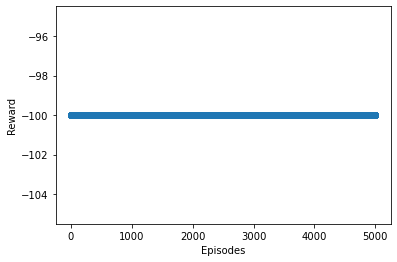

In [17]:
x = [i for i in range(0,num_episodes)]
y = np.mean(rewards_avg, axis=0)
plot.xlabel('Episodes')
plot.ylabel('Reward')
plot.plot(x, y,'o')

# Conclusions

 Due to time neither the number of episodes nor the number of steps can be greater. More tests are indispensable.
 It was tried to run the algorithm without the library gym and some functions were replaced but more information is needed in order to know exactly how those functions work. 